In [1]:
include("Main_module.jl")
using .TDQMC
using PyPlot

In [15]:
P = Parameter{Float64,Int64}()
Dy = Dynamics{Float64}();
hist(Dy.Trajectory', P.sampling, density = true);
plot(P.sampling, pdf(Normal(0, 10), P.sampling), color = "red")
xlim(-30, 30)

LoadError: UndefVarError: Normal not defined

In [3]:
parallel_CTR!(P, Dy)

[1, 1, 1, 1]
[1, 1, 1, 1]
[1, 1, 1, 1]
[1, 1, 1, 1]
[1, 2, 1, 1]
[1, 2, 2, 1]
[2, 2, 2, 1]
[2, 3, 2, 1]
[2, 3, 3, 2]
[2, 3, 3, 2]
[2, 3, 3, 3]
[3, 3, 3, 3]
[3, 3, 4, 3]
[3, 4, 4, 3]
[3, 4, 5, 4]
[3, 4, 5, 4]
[3, 4, 5, 5]
[3, 5, 5, 5]
[3, 6, 5, 5]
[3, 6, 6, 5]
[3, 6, 6, 6]
[3, 6, 6, 7]
[4, 6, 6, 7]
[4, 7, 6, 7]
[4, 8, 6, 7]
[4, 8, 7, 7]
[5, 8, 7, 7]
[5, 8, 7, 8]
[6, 8, 7, 8]
[6, 8, 8, 8]
[6, 9, 8, 8]
[6, 9, 8, 9]
[6, 9, 9, 9]
[7, 9, 9, 9]
[7, 10, 9, 9]
[7, 10, 10, 9]
[7, 10, 10, 10]
[8, 10, 10, 10]
[8, 11, 10, 10]
[8, 11, 11, 10]
[8, 11, 11, 11]
[8, 11, 12, 11]
[9, 11, 12, 11]
[9, 12, 12, 11]
[9, 12, 13, 11]
[9, 12, 13, 12]
[9, 13, 13, 12]
[10, 13, 13, 12]
[10, 13, 13, 13]
[10, 13, 14, 13]
[10, 14, 14, 13]
[10, 14, 14, 14]
[11, 14, 14, 14]
[11, 14, 15, 14]
[11, 14, 15, 15]
[11, 15, 15, 15]
[12, 15, 15, 15]
[12, 16, 15, 15]
[12, 16, 16, 15]
[12, 16, 16, 16]
[13, 16, 16, 16]
[14, 16, 16, 16]
[14, 17, 16, 16]
[14, 17, 16, 17]
[14, 18, 16, 17]
[14, 18, 16, 18]
[14, 18, 17, 18]
[15, 18, 17, 

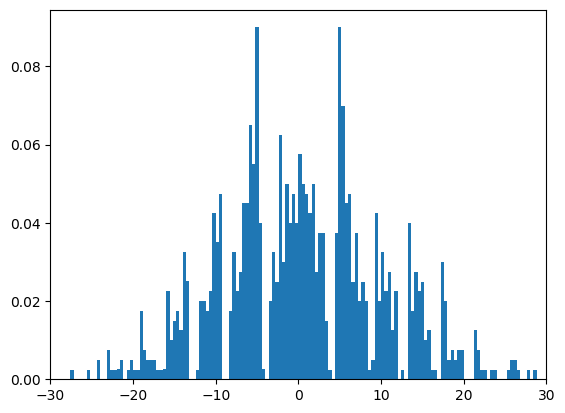

(-30.0, 30.0)

In [4]:
using PyPlot
hist(Dy.Trajectory', P.sampling, density = true)
xlim(-30, 30)


In [5]:
sum(Dy.Energy)/length(Dy.Energy)

1.3451920641916275

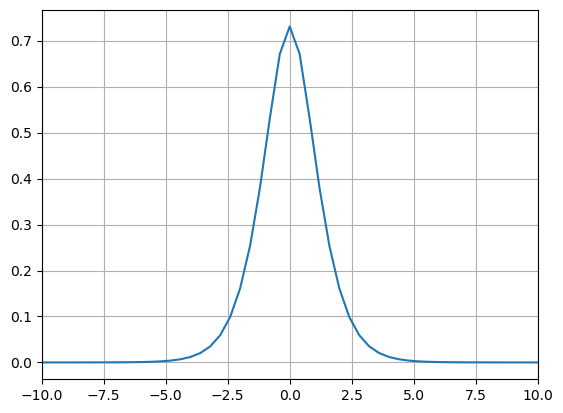

In [13]:
plot(P.sampling, abs.(Dy.Guide_Wave[1]))
xlim(-10,10)
grid()

In [14]:
Dy.Time

1000-element Vector{Union{Float64, ComplexF64}}:
                3.1 - 3.1im
                6.0 - 6.0im
 6.1000000000000005 - 6.1000000000000005im
 14.600000000000001 - 14.600000000000001im
  7.050000000000001 - 7.050000000000001im
                3.1 - 3.1im
 10.450000000000001 - 10.450000000000001im
 6.1000000000000005 - 6.1000000000000005im
               6.95 - 6.95im
               4.55 - 4.55im
               5.95 - 5.95im
  7.050000000000001 - 7.050000000000001im
               5.95 - 5.95im
                    ⋮
               0.05 - 0.05im
              11.55 - 11.55im
 10.600000000000001 - 10.600000000000001im
                9.4 - 9.4im
  7.050000000000001 - 7.050000000000001im
              13.55 - 13.55im
  9.450000000000001 - 9.450000000000001im
                9.4 - 9.4im
  6.050000000000001 - 6.050000000000001im
                7.0 - 7.0im
 3.1500000000000004 - 3.1500000000000004im
                8.0 - 8.0im